In [1]:
import pandas as pd
import preprocessing as pp
import numpy as np
from sklearn.ensemble import RandomForestClassifier
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import utils as utils

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Métricas finales

Se eligió el Modelo 3 a partir de los valores obtenidos en Cross Validation (su roc_auc promedio es el mayor). 

In [21]:
preprocessor = pp.PreprocessingOHE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, 
                               n_jobs=-1, 
                               max_depth=8, 
                               min_samples_leaf=1, 
                               min_samples_split=14, 
                               max_features=7)

In [22]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.896232,0.867769,0.916667,0.717391,0.804878


Matriz de confusión:


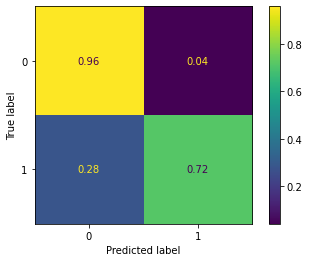

In [23]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

La métrica objetivo AUC-ROC tiene un resultado similar al obtenido por 1-ArbolDeDecision. Nuevamente no se logra un buen resultado de Recall y eso se debe a que de los casos verdaderamente positivos el modelo selecciona como negativos al 28% (un 4% por encima del Arbol de Decision), esa tasa de Falsos Negativos perjudica directamente al Recall (recordando que `Recall = TP / (TP + FN)`. Sin embargo, la tasa de Falsos Positivos es considerablemente más baja que la del modelo anterior, por lo que el resultado obtenido en Precision es mucho mejor (recordando que `Precision = TP / (TP + FP)`).

### Predicción HoldOut

In [24]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/2-RandomForest-OHE.csv')